# Exercise 2a: Plotting

## Aim: Learn to create plots with the inbuilt `.plot()` function

Find the teaching resources here: https://tutorial.xarray.dev/fundamentals/04.1_basic_plotting.html

### Issues Covered: 
- Creating and customising plots using the inbuilt xarray `.plot()` function
- Creating a time-series using `.sel()` and `.isel()` and plotting these.

## 1. Plotting

Q1. Import the `'../data/xbhubo.pgc0apr.nc'` dataset and create the temperature data array as in the last lesson.

In [5]:
import xarray as xr
ds = xr.load_dataset('../data/xbhubo.pgc0apr.nc')
df_temp = ds['temp']
# df_temp = ds.temp 

Q2. Try a simple `.plot()` on your temperature data array, to see what xarray does. Why has it done this?

(array([167948.,  74985.,  46325.,  32775.,  30391.,  26162.,  25805.,
         27845.,  21516.,    587.]),
 array([-1.79998779,  1.88496089,  5.56990957,  9.25485802, 12.93980694,
        16.62475586, 20.30970383, 23.9946537 , 27.67960167, 31.36455154,
        35.04949951]),
 <BarContainer object of 10 artists>)

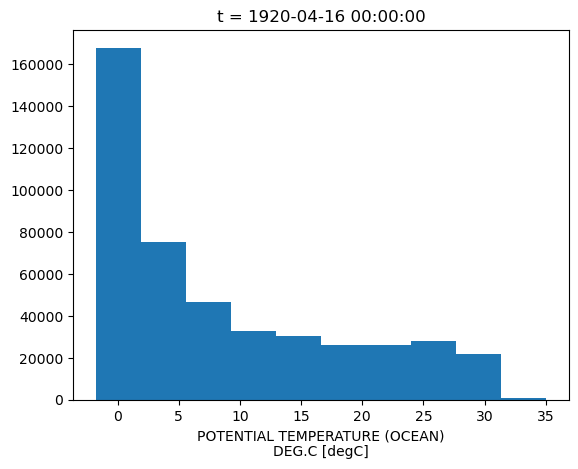

In [6]:
df_temp.plot()

Q3. Next, try the same with a 2-dimensional view of your dataset. Try selecting sea surface temperature values and plotting those.

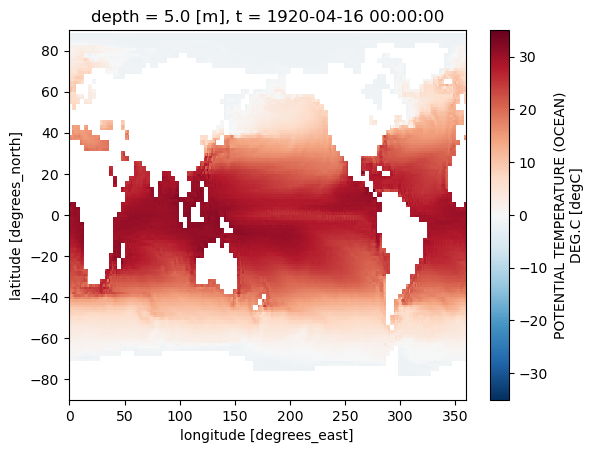

In [7]:
df_temp.sel(depth=0, method = 'nearest').plot()

Q4. Finally, create a depth profile from `temperature` by using `sel` to select data for the same latitude and longitude values (31,0).

Hint: The latitude value is `-50.625` and the longitude value is `0`. All 3 of these methods will return the same dataset.

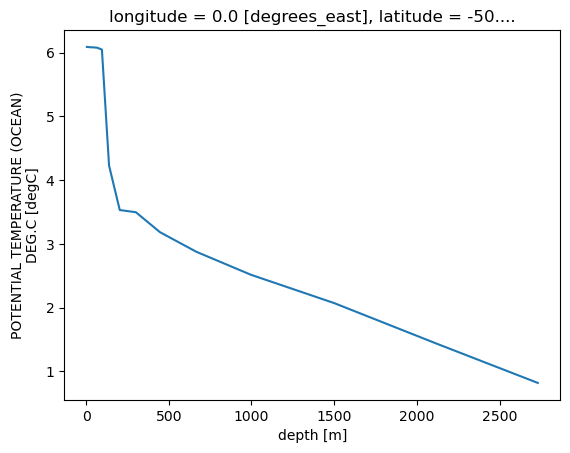

In [9]:
df_temp.sel(latitude=-50.6, longitude=0, method = 'nearest').plot()

Q5. Create a plot from this time series.

In [26]:
df_temp

<xarray.DataArray 'temp' (t: 1, depth: 20, latitude: 144, longitude: 288)> Size: 3MB
array([[[[       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         ...,
         [-1.6890869, -1.6889343, -1.6889343, ..., -1.6904602,
          -1.6899109, -1.6894226],
         [-1.751648 , -1.7536316, -1.7547607, ..., -1.7432251,
          -1.7460938, -1.7489929],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan]],

        [[       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
...
          -1.7268066, -1.7267761],
         [-1.7083435, -1.7077942, -1.7072144, ..., -1.7094421,
          -1.709198 , -1.7088013],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan]],

        [[       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         ...,
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan]]]],
      shape=(1, 20, 144, 288), dtype=float32)
Coordinates:
  * longitude  (longitude) float32 1kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * latitude   (latitude) float32 576B -89.38 -88.12 -86.88 ... 88.12 89.38
  * depth      (depth) float32 80B 5.0 15.0 25.0 ... 4.577e+03 5.192e+03
  * t          (t) object 8B 1920-04-16 00:00:00
Attributes:
    source:     Unified Model Output:
    name:       temp
    title:      POTENTIAL TEMPERATURE (OCEAN)  DEG.C
    date:       01/12/99
    time:       00:00
    long_name:  POTENTIAL TEMPERATURE (OCEAN)  DEG.C
    units:      degC
    valid_min:  -1.7999878
    valid_max:  35.0495

Text(0.5, 1.0, 'Depth Profile of Ocean Temp at lat -50.625, lon 0')

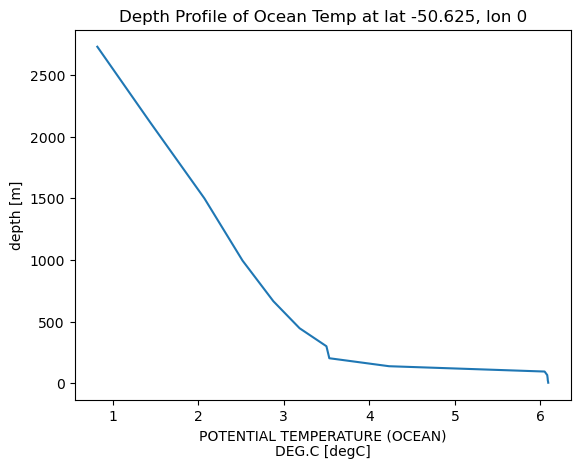

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df_temp.sel(latitude=-50.6, longitude=0, method = 'nearest').plot(ax=ax, y='depth')
ax.set_title('Depth Profile of Ocean Temp at lat -50.625, lon 0')

Q6. Make the plot red with 'x' marking the points.

Text(0.5, 1.0, 'Depth Profile of Ocean Temp at lat -50.625, lon 0')

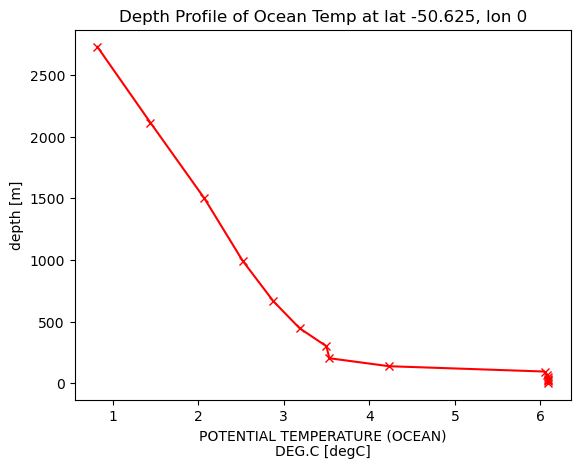

In [38]:
fig, ax = plt.subplots()
df_temp.sel(latitude=-50.6, longitude=0, method = 'nearest').plot(ax=ax, y='depth', color='red', marker = 'x')
ax.set_title('Depth Profile of Ocean Temp at lat -50.625, lon 0')


Q7. Create a time series plot comparing the temperature profile at three different grid cells:
 - lat = -50.625, lon = 0
 - lat = 0, lon = 200
 - lat = 0, lon = 320

Make sure each time series has a different colour and include a legend. As an extension, give them different linestyles too.
Hint: use `.sel` to index the lat and lon.

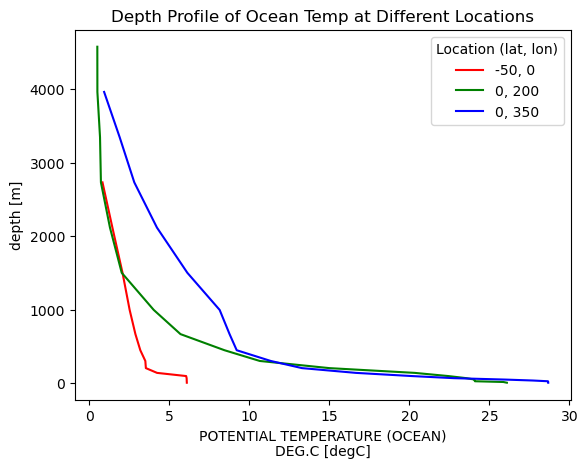

In [50]:
fig, ax = plt.subplots()
df_temp.sel(latitude=-50.6, longitude=0, method = 'nearest').plot(ax=ax, y='depth', color='red', label='-50, 0')
df_temp.sel(latitude=0, longitude=200, method='nearest').plot(ax=ax, y='depth', color='green', label='0, 200')
df_temp.sel(latitude=0, longitude=320, method='nearest').plot(ax=ax, y='depth', color='blue', label='0, 350')
ax.set_title('Depth Profile of Ocean Temp at Different Locations')
ax.legend(title='Location (lat, lon)')

Q8. Let's plot some data in 2D. Use `sel` to select data for 200 meters below the surface.

In [64]:
df_temp.sel(depth=200, method='nearest').max()

<xarray.DataArray 'temp' ()> Size: 4B
array(28.014282, dtype=float32)
Coordinates:
    depth    float32 4B 203.7

In [65]:
df_temp.sel(depth=200, method='nearest').min()

<xarray.DataArray 'temp' ()> Size: 4B
array(-1.7893982, dtype=float32)
Coordinates:
    depth    float32 4B 203.7

Text(0.5, 1.0, 'Potential Ocean Temp at 200m b.s.l.')

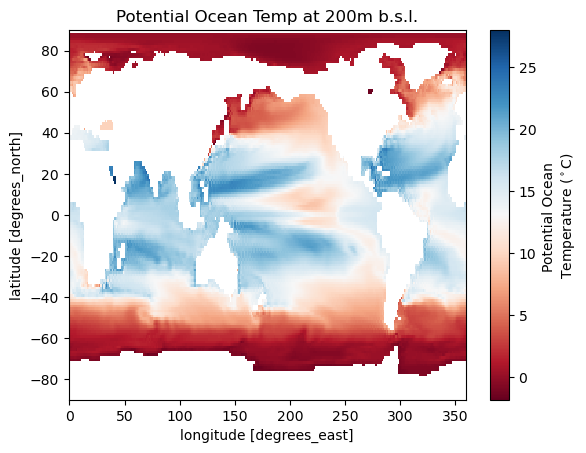

In [82]:
import matplotlib as mpl
dattoplot = df_temp.sel(depth=200, method='nearest')

fig, ax = plt.subplots()
mappable=dattoplot.plot(ax=ax,
                        cmap=mpl.cm.RdBu,
                        vmin = dattoplot.min(),
                        vmax = dattoplot.max(),
                        cbar_kwargs={  # passed to plt.colorbar
                            "orientation": "vertical",
                            "label": "Potential Ocean \nTemperature ($^\circ$C)",
                        },)

#mappable.colorbar.set_label("Potential Ocean \nTemperature ($^\circ$C)")
#mappable.set_clim(dattoplot.max(), dattoplot.min())
ax.set_title('Potential Ocean Temp at 200m b.s.l.')
#ax.set_ylabel

